<center><h3>simpleLinearRegression</h3></center>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np

In [65]:
#Chargement du jeu de données

salaryData = pd.read_csv('./../../Datasets/Salary_Data.csv')

In [66]:
salaryData["YearsExperience"] = salaryData["YearsExperience"].fillna(salaryData["YearsExperience"].mean())
salaryData["Salary"] = salaryData["Salary"].fillna(salaryData["Salary"].mean())

In [67]:
salaryData.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [68]:
salaryData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


affichage de la distribution des salaires en fonction des années d'esperiences

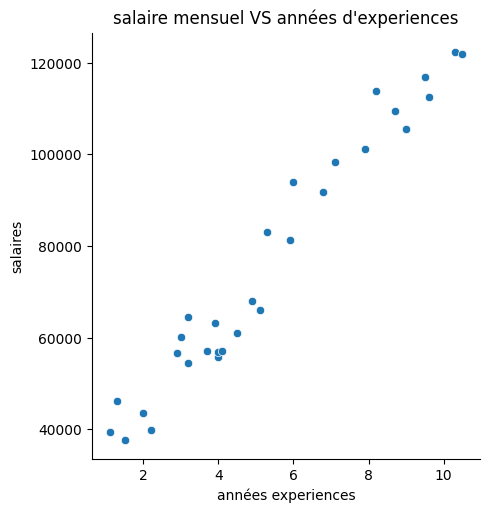

In [69]:
nuagePoints = sns.relplot(x="YearsExperience", y="Salary", data=salaryData, kind="scatter")

nuagePoints.set(title="salaire mensuel VS années d'experiences", xlabel="années experiences", ylabel="salaires" )
plt.show()

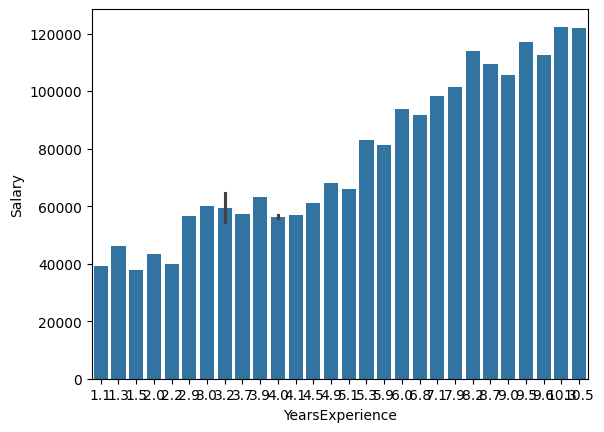

In [70]:
sns.barplot(x="YearsExperience", y="Salary", data=salaryData)
plt.show()

In [71]:
dataset = salaryData[["YearsExperience", "Salary"]].values
dataset

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [72]:
Y_dataset = salaryData.iloc[:, 1].values
X_dataset = salaryData.iloc[:, 0].values

In [73]:
"""
Avec la regression linéaire simple on a pas besoin de normaliser les données
, bien sur vous pouvez le faire si vous le voulez.
"""

'\nAvec la regression linéaire simple on a pas besoin de normaliser les données\n, bien sur vous pouvez le faire si vous le voulez.\n'

In [74]:
X_train, x_test, Y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=0)


In [75]:
Y_train = np.array(Y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1,1)

In [76]:
print(X_train.shape)  # Should be (n_samples, n_features)  
print(Y_train.shape)  # Should be (n_samples,)

(24, 1)
(24, 1)


In [77]:
linearRegression = LinearRegression()

linearRegression.fit(X_train, Y_train)

LinearRegression()

<center>Prediction</center>

In [78]:
y_prediction = linearRegression.predict(x_test)
y_prediction

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [79]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

<center>Affichage ou visualisation des données d'entrainement du modele</cneter>

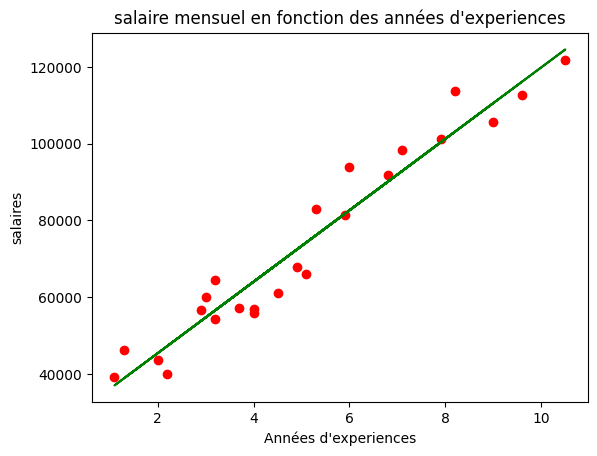

In [84]:
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, linearRegression.predict(X_train), color="green")
plt.title("salaire mensuel en fonction des années d'experiences")
plt.xlabel("Années d'experiences")
plt.ylabel("salaires")
plt.show()

<center>Visualisation des données de test sur le modele<center>

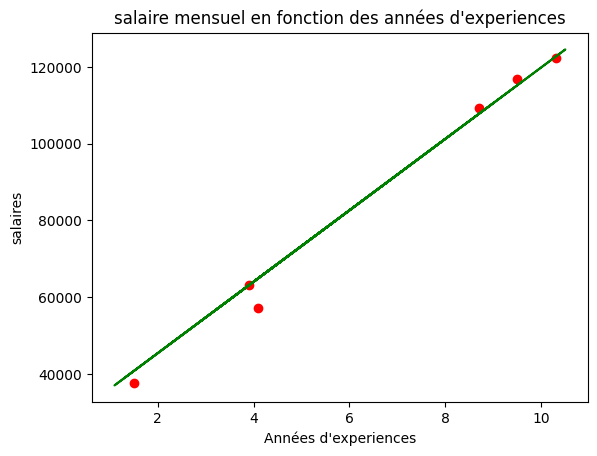

In [85]:
plt.scatter(x_test, y_test, color="red")
plt.plot(X_train, linearRegression.predict(X_train), color="green")
plt.title("salaire mensuel en fonction des années d'experiences")
plt.xlabel("Années d'experiences")
plt.ylabel("salaires")
plt.show()

<center>Evaluation des performances du modele de regression linéaire</center>

In [95]:
error = mean_squared_error(y_prediction, y_test)
print(f"taux d'erreur sur les données de test: ", error)

taux d'erreur sur les données de test:  12823412.298126549


<center>Exemple d'utilisation du modele</center>

In [96]:
anneeExperience = np.array([20, 2, 8]).reshape(-1,1)
salaire = linearRegression.predict(anneeExperience)
print(salaire)

[[213031.60168521]
 [ 45405.24940409]
 [101280.70016446]]
